<a href="https://colab.research.google.com/github/antsh3k/NN-learning/blob/master/Neural_Networks_ANN_Expanded_Material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SWICH RUNTIME TO GPU


import numpy as np
import sklearn.metrics

# For ploting 
import matplotlib.pyplot as plt
import seaborn as sns

# Get torch stuff
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

np.random.seed(42)

# **Activation functions**

Linear:

$f(z) = z$

---
Step:

$f(z) = \begin{cases}
    1,& \text{if } z > 0\\
    0,              & z \le 0
\end{cases}$

---
Sigmoid:

$f(z) = \frac{1}{1 + e^{-z}}$

---
tanh:

$f(z) = tanh(z) = \frac{1 - e^{-z}}{1 + e^{-z}}$

---
ReLU:

$f(z) = max(0, z)$



In [0]:
def step(z):
  return np.array(z > 0, dtype=np.int32)

def tanh(z):
  return np.tanh(z)

def sigmoid(z):
  return 1 / (1 + np.exp(-z))
  
def relu(z):
  return np.maximum(0, z)

In [0]:
# Same dataset as last time
np.random.seed(10)
x = np.random.randint(-30, 40, 1000)
y = np.array([1 if v > 20 else 0 for v in x])
print(x[:10])
print(y[:10])
for i in range(10):
  print("If the temperature is {:4} it is  {}".format(x[i], "hot" if y[i] == 1 else "cold"))

[-21 -15  34  -2  -1 -22 -30  10   6 -14]
[0 0 1 0 0 0 0 0 0 0]
If the temperature is  -21 it is  cold
If the temperature is  -15 it is  cold
If the temperature is   34 it is  hot
If the temperature is   -2 it is  cold
If the temperature is   -1 it is  cold
If the temperature is  -22 it is  cold
If the temperature is  -30 it is  cold
If the temperature is   10 it is  cold
If the temperature is    6 it is  cold
If the temperature is  -14 it is  cold


In [0]:
_, counts = np.unique(y, return_counts=True)
print(f"Samples Counts by Class:\n'Cold':{counts[0]}, 'Hot':{counts[1]}")

Samples Counts by Class:
'Cold':762, 'Hot':238


# Initialize the parameters

<img src="https://drive.google.com/uc?export=view&id=1NEd7WQrLTUzAPz44t6bUEma02LH4GOT3" height='250px' />

The first thing we need to do is initialize the parameters of our NN. In our case we only have two parameters $w_1$ and $b_1$. Usually a random valaue between -1 and 1 is assigned to both. 

In [0]:
# TODO: The forward pass 
def forward(x, w, b):
  # complete function
  z = w*x + b
  yh = relu(z)
  pass

In [0]:
#@title
#Answers
def forward(x, w, b):
  z = w*x + b
  yh = sigmoid(z)
  return yh

# Cost function / Loss function / Error function

Cross entropy loss is defined as:

$
L = -\frac{1}{N}\sum_i y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i) \\
$



$
N - \text{Number of examples in our training set} \\
y_i - \text{The ground truth} \\
\hat{y}_i - \text{The predicted value}\\
$

---
$
y = 1 = hot \\
yh = 0.3 = cold \\
L = -1 \cdot log(0.3) + (1 - 1)log(1-0.3) = -log(0.3) = 1.2 \\
$

$
y = 1 = hot \\
yh = 0.9 = hot \\
L = -1 \cdot log(0.9) + (1 - 1)log(1-0.9) = -log(0.9) = 0.1 \\
$

$
y = 1 = hot \\
yh = 0.01 = cold \\
L = -1 \cdot log(0.01) + (1 - 1)log(1-0.01) = -log(0.01) = 4.6
$

# Backward Pass
* Neurons need to figure out how much a change in the final score is affected by their own parameters.
* Aim to adjust the weights of each neuron to improve the score. 
* Take partial derivs of score with respect to all params of the model. 
* This is a general purpose algorithm for updating parameters of the model to reduce the error of a given upstream output.
* Params in this case is only the weight (w1) and bias (b).

General derivative of sigmoid:

$\sigma  = sigmoid $

$\sigma = \frac{1}{1 + e^{-x}} $

$\frac{d \sigma}{d x} = \sigma ( x) (1 - \sigma(x)) $


Partial derivatives w.r.t all params:

$ \frac{\partial y}{\partial w} = \frac{\partial y}{ \partial h} \frac{\partial h}{\partial z} \frac{\partial z}{\partial w}  $ 

$ \frac{\partial y}{\partial b} = \frac{\partial y}{\partial h} \frac{\partial h}{\partial z} \frac{\partial z}{\partial b} $

$ \frac{\partial y}{\partial x} = \frac{\partial y}{\partial h} \frac{\partial h}{\partial z}  \frac{\partial z}{\partial x}$



In [0]:
# TOOD: Implement backward pass using the above formulae, 
# to return dy_dw, dy_db, dy_dx

def d_sigmoid(x):
  sigmoid(x) * (1-sigmoid(x))
  pass

def backward(yh, x, w, b):
  dy_dw = 
  dy_db = 
  dy_dx = 
  
  return dy_dw, dy_db, dy_dx

SyntaxError: ignored

In [0]:
#@title
# Answers
def d_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

def backward(yh, x, w, b) -> (np.array, np.array, np.array):
  # as we only have one neuron, change in output at the end is equal to the change in output from this neuron
  dy_dh = 1 #this would be y/h
  z = w * x + b
  dh_dz = d_sigmoid(z) * 1 # chain rule 
  dz_dw = x

  dy_dw = dy_dh * dh_dz * dz_dw

  dz_db = 1 # deriv of a variable with respect to itself is just 1
  dy_db = dy_dh * dh_dz * dz_db

  dz_dx = w1
  dy_dx = 1 * dh_dz * dz_dx
  return (dy_dw, dy_db, dy_dx)


## Adjust Parameters Iteratively

Update each param using the learning rate and partial deriv of the loss w.r.t to the param.

$
w_{new} = w_{old} - \alpha  \frac{\partial y}{\partial w}
$

$
b_{new} = b_{old} - \alpha \frac{\partial y}{\partial b}
$

Generally - this can be written as:

$
\theta_{new} = \theta_{old} - \alpha \nabla J(\theta)
$


In [0]:
# TODO: Implement the above parameter updates for our single neuron model
def update_params(w1, dy_dw, b1, dy_db, alpha) -> (np.array, np.array):
  w1 = w1 - (alpha * dy_dw)
  b1 = b1 - (alpha * dy_db)
  return w1, b1

In [0]:
#@title
# Answers
# average the gradients across all items
def update_params(w1, dy_dw, b1, dy_db, alpha) -> (float, float):
  w1 = w1 - (alpha * dy_dw)
  b1 = b1 - (alpha * dy_db)
  return w1, b1
# x is not a param of our model so we leave it out here.

In [0]:
#TODO: Initialise params
def init() -> (float, float):
  #Set seed, so that we always have the same result
  np.random.seed(13)
  wn = np.random.uniform(-1, 1)
  bn = np.random.uniform(-1, 1)
  return wn, bn

In [0]:
#@title
# Answers
def init() -> (float, float):  
  np.random.seed(13)
  w1 = np.random.uniform(-1, 1)
  b1 = np.random.uniform(-1, 1)
  return w1, b1

In [0]:
def loss_accu(y, yh):
  loss = sklearn.metrics.log_loss(y, yh)
#   print(f'Loss:{loss}')
  yh_temp = ['hot' if val > 0.5 else 'cold' for val in yh]
  acc = sklearn.metrics.accuracy_score(y, [1 if x == 'hot' else 0 for x in yh_temp])
#   print(f'Accu:{acc}')
  return loss, acc

## Let's put the pieces together and train the neuron

* Init params, w1, b1
* Pick an alpha, and a number of epochs.
* Loop over the dataset epoch times. In each loop:
 * Compute forward(x, y )
 * Compute backward(yh, x, w1, b1)
 * average gradients
 * update_params
  
### Experiment with different values for alpha / and epochs. 

Possible values to try:
alpha = { 0.1 , 0.01, 0.001, 0.0001}, 
epochs = {1000, 10000, 100000}
or any other value you can think of.

Try and find the best one that balances speed to convergence and performance.

In [0]:
#@title
#Answers
w1, b1 = init()
epochs = 50000 #50000
alpha = 0.0001 #0.0001

# record things...
bs, ls, ws, acs = [], [], [], []
for _ in range(epochs):
  # run forward
  yh = forward(x, w1, b1)
    
  # only print every 100 epochs
  if _ == 0 or _ % 100 == 0:
    loss, acc = loss_accu(y, yh)
    ws.append(w1)
    bs.append(w1)
    ls.append(loss) 
    acs.append(acc)
  dy_dw, dy_db, dy_dx = backward(yh, x, w1, b1)
  
  dy_dw_avg = np.mean(dy_dw)
  dy_db_avg = np.mean(dy_db)
  dy_dx_avg = np.mean(dy_dx)
  
  w1, b1 = update_params(w1, dy_dw_avg, b1, dy_db_avg, alpha)
print(w1, b1)

0.21176273661196324 -0.7141329392163922


In [0]:
#@title
def plots(ws, bs, losses, accs):
  fig = plt.figure()
  fig.subplots_adjust(hspace=0.6, wspace=0.6)
  fig.set_size_inches(10, 10)

  plt.subplot(2, 2, 1)
  sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

  plt.subplot(2, 2, 2)
  sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

  plt.subplot(2, 2, 3)
  sns.lineplot(np.arange(0, len(accs)), accs).set_title("accs")

  plt.subplot(2, 2, 4)
  sns.lineplot(np.arange(0, len(losses)), losses).set_title("losses")
  fig.show()

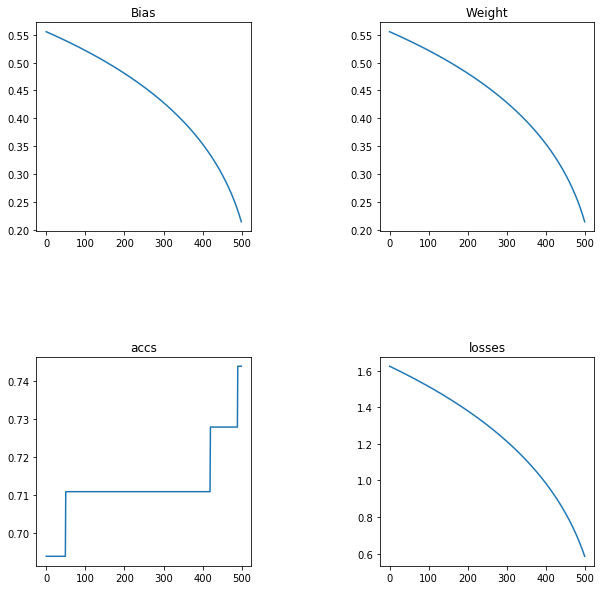

In [0]:
plots(ws, bs, ls, acs)

# Why can't we get any better, loss is decreasing but accuracy is the same!

# Possible Issues:
* Out Dataset is too unbalanced
* The Model is not flexible enough (too high bias, not enough variance)
* We didn't try the correct combination of learning rate / epochs
* We inited the params in a bad place

# Multi Layer Perceptron (MLP)

<img src="https://drive.google.com/uc?export=view&id=1I4YkeCwhoQtB7_vgs-V5lg50HTUp28tO" height='250px' />

Notation:

$
x_1 - \text{Input} \\
ŷ_1 - \text{Output} \\
$

$
w^1_1 - \text{Weights for the first layer} \\
w^1_2 - \text{Weights for the second layer} \\
b^1_1 - \text{bias term of layer 1, neuron 1} \\
b^1_2 - \text{bias term of layer 1, neuron 2} \\
b^2_1 - \text{bias term of layer 2, neuron 1} \\
z^1_1 = w1_1 \cdot x_1 + b_1 \\
z^1_2 = w1_2 \cdot x_2 + b_2 \\
z^2_1 = w2_1 \cdot x_2 +  b_2\\
$

Actions on weights, bias terms with fully connected layers can be represented using matrix operations, at each layer:

$
W = \text{Weights of all inputs to all outputs per layer} \\
x = \text{Input vector} \\
z = \text{linear combination of the inputs & weights + bias} \\
h = \text{output of the neuron with z and non-linearity} \\
$

Generally each neuron computes: 

$
z = W \cdot x  + b\\
h = f(z) \\
$



In [0]:
#Set seed, so that we always have the same result
np.random.seed(13)


rnd = lambda: np.random.uniform(-1, 1)
# TODO: Initialize the parameters of the Neural Network

w1 = np.array([rnd(), rnd()])
b1 = np.array([rnd(), rnd()])
w2 = np.array([rnd(), rnd()]).T
b2 = np.array([rnd()])

In [0]:
# TODO: Implement the fwd pass, output vector should be called yh

# Note: dimensions of w1 and w2, that are column and row vectors respectively.

# yh should be a list of probabilities, one for each input training sample

In [0]:
#@title
# Answers
yh = []
for training_item in x:
  z1 = w1 * training_item + b1
  h1 = sigmoid(z1)
  z2 = np.matmul(w2.T, h1) + b2
  h2 = sigmoid(z2)
  yh.append(h2)
  
print(yh)

[array([0.53120927]), array([0.53131714]), array([0.76192949]), array([0.62282118]), array([0.65411532]), array([0.53120756]), array([0.53120527]), array([0.76136051]), array([0.75709691]), array([0.53139998]), array([0.53121743]), array([0.7619292]), array([0.76192949]), array([0.74005076]), array([0.76192515]), array([0.76192802]), array([0.7619292]), array([0.76192949]), array([0.53124217]), array([0.55677903]), array([0.53124217]), array([0.68395255]), array([0.68395255]), array([0.53122646]), array([0.76192949]), array([0.70874072]), array([0.76192944]), array([0.75709691]), array([0.59458231]), array([0.5317946]), array([0.53651504]), array([0.54030039]), array([0.53121743]), array([0.62282118]), array([0.53120927]), array([0.53131714]), array([0.5317946]), array([0.53121743]), array([0.53154409]), array([0.76190746]), array([0.53120657]), array([0.62282118]), array([0.74005076]), array([0.76186433]), array([0.53120568]), array([0.5312055]), array([0.76192697]), array([0.7619292]

# Backward Pass
Calculate partials respect to all params
W1, W2, B1, B2

NB: W and B are vectors to reflect the multiple input and multiple outputs of neurons at respective layers.



For any given node within a network we can generalise to:

$
\frac{\partial y}{\partial w} = \frac{\partial y}{\partial h}  \frac{\partial h}{\partial z} \frac{\partial z}{\partial W}\\
$

$
\frac{\partial y}{\partial b} = \frac{\partial y}{\partial h}  \frac{\partial h}{\partial z} \frac{\partial z} {\partial b} \\ 
$

Upstream gradient:
$
\frac{\partial y}{\partial h}
$

Local gradient:
$
\frac{\partial h}{\partial x}
$

Downstream gradient:
$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial h}  \frac{\partial h}{\partial x} 
$


<img src="https://drive.google.com/uc?export=view&id=1MPpUS1kt8yF-ovjR986S1jGkkNHkKIBJ" />

The gradient of a node is the sum of the local gradient of successor nodes multiplied by their own upstream 
gradient. 

Where $ \{ y_1, y_2, ... y_n \} = $ successor nodes of $x$

$
\frac{\partial f}{\partial x} = \sum \frac{\partial f}{\partial y_i}  \frac{\partial y_i}{\partial x} 
$

# Deep Learning Frameworks

Modern deep learning frameworks offer auto differentiation features. So, only the forward pass needs to be implemented.  The framework (generally) keeps track of computation graph state to be used in backprop of errors.

NB: Potentially any sequence of operations are differentiable with these frameworks



# **1. Prepare the dataset**

In [0]:
device = torch.device('cuda')

# The whole dataset
print(x[0:10])
print(y[0:10])
print()
# Print the size
print("The size of our dataset is: " + str(x.size))

[-21 -15  34  -2  -1 -22 -30  10   6 -14]
[0 0 1 0 0 0 0 0 0 0]

The size of our dataset is: 1000




---


**Generate a train/test/dev dataset**

In [0]:
def split(x, y):  
  inds = np.random.permutation(len(x))
  inds_train = inds[0:int(0.8*len(x))]
  inds_test = inds[int(0.8*len(x)):int(0.9*len(x))]
  inds_dev = inds[int(0.9*len(x)):]

  # 80% of the dataset
  x_train = x[inds_train]
  y_train = y[inds_train]

  # 10% of the dataset
  x_test = x[inds_test]
  y_test = y[inds_test]

  # 10% of the dataset
  x_dev = x[inds_dev]
  y_dev = y[inds_dev]
  
  return x_train, x_dev, x_test, y_train, y_dev, y_test

x_train, x_dev, x_test, y_train, y_dev, y_test = split(x, y)



---


**Convert the inputs to PyTorch**

In [0]:
def np_to_tensor(np_arr):
  return torch.tensor(np_arr.reshape(-1, 1), dtype=torch.float32)

x_train, y_train, x_dev, y_dev, x_test, y_test = (np_to_tensor(arr) for arr in
                                                  (x_train, y_train, x_dev, y_dev, x_test, y_test))


In [0]:
print(x_train[:10])
x_train.shape

tensor([[-11.],
        [-21.],
        [ 11.],
        [-23.],
        [  9.],
        [-16.],
        [  4.],
        [ 10.],
        [-16.],
        [  2.]])


torch.Size([800, 1])

# Build the Neural Network

In [0]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 1)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      return x

# Initialize the NN

We also create the criterion (loss function) and the optimizer

In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999)

In [0]:
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
tensor([[-0.3298]], requires_grad=True)
Parameter containing:
tensor([0.2377], requires_grad=True)


# Train

In [0]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)

x_dev = x_dev.to(device)
y_dev = y_dev.to(device)

net.train()
losses = []
accs = []
ws = []
bs = []
for epoch in range(10000):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      
      outputs_dev = net(x_dev)
      acc_dev = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs_dev.cpu().detach().numpy()], y_dev.cpu().numpy())
      
      print("Epoch: {:4} Loss: {:.5f} Acc: {:.3f} Acc Dev: {:.3f}".format(epoch, loss.item(), acc, acc_dev))

print('Finished Training')

Epoch:    0 Loss: 4.60766 Acc: 0.321 Acc Dev: 0.200
Epoch:  500 Loss: 3.84055 Acc: 0.696 Acc Dev: 0.820
Epoch: 1000 Loss: 1.65814 Acc: 0.781 Acc Dev: 0.870
Epoch: 1500 Loss: 0.63883 Acc: 0.879 Acc Dev: 0.890
Epoch: 2000 Loss: 0.16825 Acc: 0.930 Acc Dev: 0.880
Epoch: 2500 Loss: 0.30519 Acc: 0.882 Acc Dev: 0.830
Epoch: 3000 Loss: 0.09051 Acc: 0.954 Acc Dev: 0.940
Epoch: 3500 Loss: 0.05387 Acc: 0.969 Acc Dev: 0.980
Epoch: 4000 Loss: 0.05488 Acc: 0.969 Acc Dev: 0.980
Epoch: 4500 Loss: 0.05618 Acc: 0.969 Acc Dev: 0.980
Epoch: 5000 Loss: 0.04223 Acc: 0.979 Acc Dev: 0.980
Epoch: 5500 Loss: 0.02530 Acc: 0.986 Acc Dev: 0.990
Epoch: 6000 Loss: 0.02166 Acc: 1.000 Acc Dev: 1.000
Epoch: 6500 Loss: 0.02484 Acc: 0.985 Acc Dev: 0.990
Epoch: 7000 Loss: 0.02375 Acc: 1.000 Acc Dev: 1.000
Epoch: 7500 Loss: 0.02120 Acc: 1.000 Acc Dev: 1.000
Epoch: 8000 Loss: 0.02122 Acc: 1.000 Acc Dev: 1.000
Epoch: 8500 Loss: 0.02151 Acc: 1.000 Acc Dev: 1.000
Epoch: 9000 Loss: 0.02097 Acc: 1.000 Acc Dev: 1.000
Epoch: 9500 

# Plot Everything

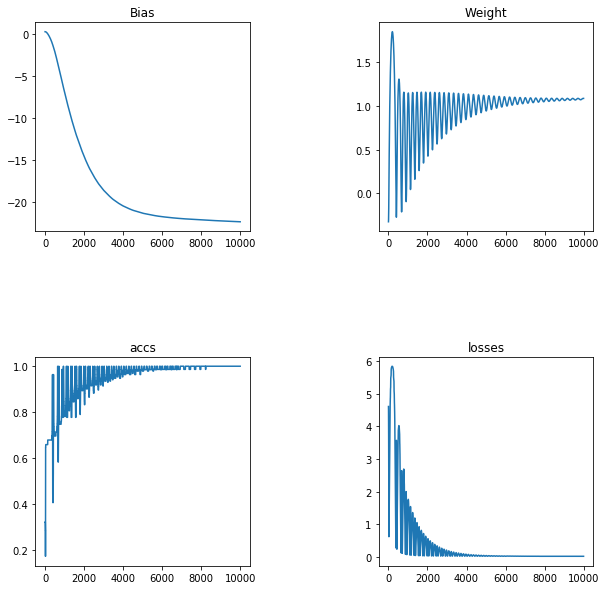

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)

plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("accs")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("losses")

fig.show()

# Let's do multiple layers

In [0]:
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 100)
      self.fc2 = nn.Linear(100, 200)
      self.fc3 = nn.Linear(200, 1)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      x = torch.sigmoid(self.fc2(x))
      x = torch.sigmoid(self.fc3(x))
      return x

In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999)

In [0]:
print(net.fc2.weight)

Parameter containing:
tensor([[ 0.0788, -0.0030, -0.0523,  ...,  0.0225,  0.0198, -0.0927],
        [ 0.0737, -0.0854,  0.0742,  ...,  0.0299, -0.0684, -0.0087],
        [-0.0890, -0.0038, -0.0829,  ...,  0.0224, -0.0649,  0.0416],
        ...,
        [ 0.0310,  0.0976, -0.0338,  ..., -0.0232, -0.0897, -0.0588],
        [ 0.0775, -0.0171, -0.0438,  ..., -0.0155,  0.0234,  0.0775],
        [-0.0882, -0.0389, -0.0501,  ..., -0.0506, -0.0248,  0.0013]],
       requires_grad=True)


In [0]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
net.train()
losses, accs, ws, bs = [], [], [], []
for epoch in range(10000):
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      print("Epoch: {:4} Loss: {:.5} Acc: {:.3}".format(epoch, loss.item(), acc))

print('Finished Training')

Epoch:    0 Loss: 0.64965 Acc: 0.777
Epoch:  500 Loss: 0.31227 Acc: 0.859
Epoch: 1000 Loss: 0.18758 Acc: 0.935
Epoch: 1500 Loss: 0.11201 Acc: 0.969
Epoch: 2000 Loss: 0.053326 Acc: 0.986
Epoch: 2500 Loss: 0.041745 Acc: 0.985
Epoch: 3000 Loss: 0.033435 Acc: 0.986
Epoch: 3500 Loss: 0.021398 Acc: 1.0
Epoch: 4000 Loss: 0.020641 Acc: 0.986
Epoch: 4500 Loss: 0.016525 Acc: 1.0
Epoch: 5000 Loss: 0.015752 Acc: 1.0
Epoch: 5500 Loss: 0.013995 Acc: 1.0
Epoch: 6000 Loss: 0.013664 Acc: 1.0
Epoch: 6500 Loss: 0.012601 Acc: 1.0
Epoch: 7000 Loss: 0.012098 Acc: 1.0
Epoch: 7500 Loss: 0.011648 Acc: 1.0
Epoch: 8000 Loss: 0.011253 Acc: 1.0
Epoch: 8500 Loss: 0.01093 Acc: 1.0
Epoch: 9000 Loss: 0.01057 Acc: 1.0
Epoch: 9500 Loss: 0.010242 Acc: 1.0
Finished Training


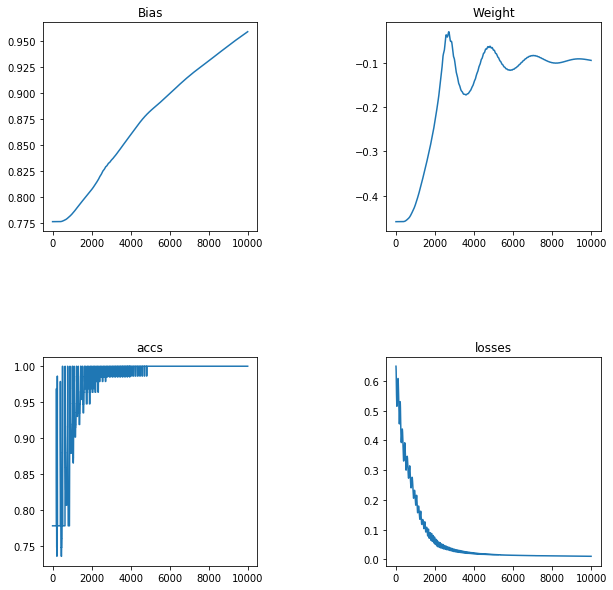

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)

plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("accs")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("losses")

fig.show()


# Multiple Classes



In [0]:
from torch.nn import CrossEntropyLoss

In [0]:
# Same dataset as last time
np.random.seed(10)
# TODO: Generate a vector with 1000 integers with values from -30 to 40
x = np.random.randint(-30, 40, 1000)
y = np.array([3 if v > 20 else 
              2 if v > 10 else
              1 if v > 0 else 0 for v in x])
for i in range(10):
  print("If the temperature is {:4} it is  {}".format(x[i], "hot" if y[i] == 3 
                                                      else "warm" if y[i] == 2
                                                      else "cold" if y[i] == 1
                                                      else "FREEEEEZING"))
# re-split the dataset
x_train, x_dev, x_test, y_train, y_dev, y_test = split(x, y)

If the temperature is  -21 it is  FREEEEEZING
If the temperature is  -15 it is  FREEEEEZING
If the temperature is   34 it is  hot
If the temperature is   -2 it is  FREEEEEZING
If the temperature is   -1 it is  FREEEEEZING
If the temperature is  -22 it is  FREEEEEZING
If the temperature is  -30 it is  FREEEEEZING
If the temperature is   10 it is  cold
If the temperature is    6 it is  cold
If the temperature is  -14 it is  FREEEEEZING


In [0]:
_, counts = np.unique(y, return_counts=True)
print(f"Sample Counts by Class:\n'FREEEEEZING':{counts[0]}, 'cold':{counts[1]}, 'warm':{counts[2]},  'hot':{counts[3]}")

Samples Counts by Class:
'FREEEEEZING':456, 'cold':165, 'warm':141,  'hot':238


In [0]:
# TODO: Instantiate the train, dev and test sets for the multi class case. 

In [0]:
#@title
## Answer
def np_to_tensor(np_arr, dtype=None):
  return torch.tensor(np_arr.reshape(-1, 1), dtype=torch.float32 if dtype is None else dtype)

x_train, x_dev,  x_test, = (np_to_tensor(arr) for arr in (x_train, x_dev, x_test))
# sublte differences in initialisation.
y_train, y_dev, y_test = (np_to_tensor(arr, dtype=torch.long).squeeze() for arr in (y_train, y_dev, y_test))

In [0]:
# Implement a similar network as above, note the output neuron difference and the loss criterion

In [0]:
#@title
#TODO - Create a network with 3 Layers for each use sigmoid as activation:

In [0]:
#@title
# Answers
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 100)
      self.fc2 = nn.Linear(100, 200)
      self.fc3 = nn.Linear(200, 4)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      x = torch.sigmoid(self.fc2(x))
      x = torch.sigmoid(self.fc3(x))
      # softmax to pick one of the classes.
      return x

In [0]:
# Instantiate:
# - the neural net,
# - the loss criterion
# - the optimiser

In [0]:
#@title
# Answers:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.999)

In [0]:
# Implement the training loop - multi this multi class problem

In [0]:
#@title
# Answers:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
net.train()
losses, accs, ws, bs = [], [], [], []
for epoch in range(10000):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  losses.append(loss.item())
  
  y_preds = np.argmax(torch.softmax(outputs, 0).cpu().detach().numpy(), axis=1)
  accs.append(sklearn.metrics.accuracy_score(y_preds, y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score(y_preds, y_train.cpu().numpy())
      print("Epoch: {:4} Loss: {:.5} Acc: {:.3}".format(epoch, loss.item(), acc))

print('Finished Training')

Epoch:    0 Loss: 1.0493 Acc: 0.782
Epoch:  500 Loss: 1.0404 Acc: 0.782
Epoch: 1000 Loss: 1.0196 Acc: 0.805
Epoch: 1500 Loss: 1.0053 Acc: 0.825
Epoch: 2000 Loss: 1.0027 Acc: 0.825
Epoch: 2500 Loss: 0.99988 Acc: 0.825
Epoch: 3000 Loss: 0.99673 Acc: 0.825
Epoch: 3500 Loss: 0.99482 Acc: 0.825
Epoch: 4000 Loss: 0.99359 Acc: 0.825
Epoch: 4500 Loss: 0.99246 Acc: 0.825
Epoch: 5000 Loss: 0.9914 Acc: 0.843
Epoch: 5500 Loss: 0.99045 Acc: 0.843
Epoch: 6000 Loss: 0.98956 Acc: 0.843
Epoch: 6500 Loss: 0.98868 Acc: 0.843
Epoch: 7000 Loss: 0.98783 Acc: 0.843
Epoch: 7500 Loss: 0.98699 Acc: 0.843
Epoch: 8000 Loss: 0.98615 Acc: 0.858
Epoch: 8500 Loss: 0.9853 Acc: 0.858
Epoch: 9000 Loss: 0.98443 Acc: 0.858
Epoch: 9500 Loss: 0.98354 Acc: 0.858
Finished Training


# NLP Use Case:

Predicting hospital readmission to ICU from Discharge Summary Text.






In [0]:
# For completeness this is SQL for two queries from mimic3. 
"""
with _pos_subj as (
	select distinct(subject_id) from icu_readmission limit 500
), _neg_subj as (
	select distinct(subject_id) from admissions where subject_id not in 
		(select distinct(subject_id) from icu_readmission limit 500) limit 575
), _noteevents as (
	select 
		n.subject_id, n.text, n.chartdate,
		row_number() over (partition by n.subject_id order by n.chartdate) as row_number 
	from 
		noteevents as n 
	where 
		n.category = 'Discharge summary'
)

select 
	pos_notes.subject_id as pos_subj, pos_notes.text as pos_text 
from
	(select 
		n.subject_id, n.text from _noteevents as n 
	 where 
		n.subject_id in (select * from _pos_subj) and
		n.row_number = '1'
	) as pos_notes;

select 
	neg_notes.subject_id as neg_subj, neg_notes.text as neg_text
from
	(select n.subject_id, n.text from _noteevents as n 
	 where
	 	n.subject_id in (select * from _neg_subj) and
		n.row_number = '1'
	) as neg_notes;
"""

In [0]:
# Download the CSV
import requests
import pandas as pd
from io import StringIO

In [0]:
resp = requests.get('http://deeplearning-nlp-tutorial.s3.amazonaws.com/neg_subj.csv')
neg_subj_df = pd.read_csv(StringIO(resp.content.decode('utf-8')))
resp = requests.get('http://deeplearning-nlp-tutorial.s3.amazonaws.com/pos_subj.csv')
pos_subj_df = pd.read_csv(StringIO(resp.content.decode('utf-8')))

In [0]:
PUNC = r'[\[\.,\\/#!$%\^&\*;:{}=\-_`~()\]\'\"\|<>/\?\@\$\%\£\+]'
def clean(df, text_col):
    df.loc[:, text_col + '_clean'] = df[text_col].str.lower()\
        .replace(to_replace=['\[\*\*.*?\*\*\]', '\d'], value=['', 'd'], regex=True) \
        .replace(r'(\s+)', ' ') \
        .replace(PUNC, ' ')
    df.loc[:, 'clean_split'] = df[text_col + '_clean'].str.split()
    return df
neg_clean = clean(neg_subj_df, 'neg_text')
pos_clean = clean(pos_subj_df, 'pos_text')

In [0]:
neg_clean['y'] = 0
pos_clean['y'] = 1

In [0]:
# don't care about the rest
neg = neg_clean.loc[:, ['clean_split', 'y']]
pos = pos_clean.loc[:, ['clean_split', 'y']]

In [0]:
data_set = pd.concat([neg, pos])
X_raw = data_set.clean_split
y = data_set.y

In [0]:
# Vectorise text before splitting as input into a new model
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Neural Networks require numerical inputs

One method of vectorising string input is the Bag-of-Words representation. These genrerally count the number of words a given set of words (the vocab) appears within the document, therefore allowing each document to be represented by one (often long and sparse) vector.

TfIDf - is another such representation that attempts to weight rare words more highly. 

More details here: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [0]:
vectoriser = TfidfVectorizer(tokenizer=lambda t: t, lowercase=False, max_features=10000)

In [0]:
X = vectoriser.fit_transform(X_raw)

In [0]:
def split():
  # implement matrix splitting version
  pass

x_train, x_dev, x_test, y_train, y_dev, y_test = split(x, y)

<986x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 528797 stored elements in Compressed Sparse Row format>

In [0]:
# Implement:
# Split
# Train
# Evaluate